In [101]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
from scipy.integrate import quad, simps
from scipy.interpolate import interp1d
#configure the fonts for matplotlib
font = {'size'   : 15}

matplotlib.rc('font', **font)

## Problem 4
we first define cosmological constants for $\Lambda$CDM. Then we follow Hogg's paper to calculate different quantities as a function of redshift.

In [2]:
#define lambda cdm constants from wmap
omega_b = .0463
omega_c = .233
omega_L = .721
omega_M =  omega_b + omega_c

In [75]:
def e_inverse(z, omega_M, omega_L):
    return 1.0/np.sqrt(omega_M * (1+z)**3 + omega_L)

#define comoving distance in a flat universe
def d_m(z, omega_M, omega_L):
    xi=np.linspace(0,z,1000)
    f = e_inverse(xi, omega_M, omega_L)
    return simps(f, xi)

#define the lookback time in a flat universe
def t_l(z, omega_M, omega_L):
    xi=np.linspace(0,z,1000)
    f = e_inverse(xi, omega_M, omega_L)*(1/(1 + xi))
    return simps(f,xi)

#define age of the universe
def t_age(z, omega_M, omega_L):
    def integrand(z, omega_M, omega_L):
        return e_inverse(z, omega_M, omega_L)*(1./(1 + z))
    return quad(integrand, z, np.inf, args=(omega_M, omega_L))

#define the luminosity distance in a flat universe
def d_l(z, omega_M, omega_L):
    return (1 + z)*d_m(z, omega_M, omega_L)

#define angular diameter distance in flat universe
def d_a(z, omega_M, omega_L):
    return d_m(z, omega_M, omega_L)/(1.0+z)

In [77]:
#initialize an array to hold luminosity distances, angular diameter distances, look back time, age
L_d = np.zeros(1000)
A_d = np.zeros(1000)
L_t = np.zeros(1000)
Age = np.zeros(1000)

#initialize array that holds redshifts up to z = 10
z_array = np.linspace(0,10,1000)

#calculate L_d and A_d etc for dif redshifts
for i in range(0,1000):
    L_d[i] = d_l(z_array[i], omega_M, omega_L)
    A_d[i] = d_a(z_array[i], omega_M, omega_L)
    L_t[i] = t_l(z_array[i], omega_M, omega_L)
    Age[i] = t_age(z_array[i], omega_M, omega_L)[0]

Now lets make sure our quantities are reasonably similar to Hogg's. His $\Omega_{M}$, $\Omega_{\Lambda}$ = (.2,.8) is pretty close to our WMAP recipie 

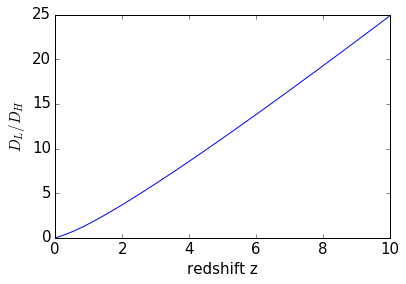

In [32]:
#do a sanity check comparing to hoggs figure
#luminosity distance
plt.plot(z_array, L_d)
plt.xlabel('redshift z')
plt.ylabel('$D_{L}/D_{H}$')

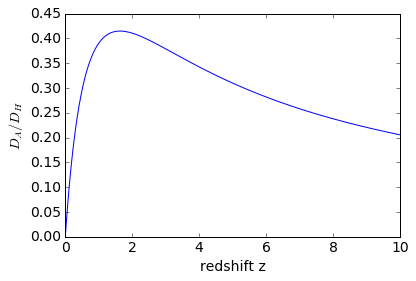

In [40]:
#sainity check against hogg's plot
#angular distance
plt.plot(z_array, A_d)
plt.xlabel('redshift z')
plt.ylabel('$D_{A}/D_{H}$')

(0, 5)

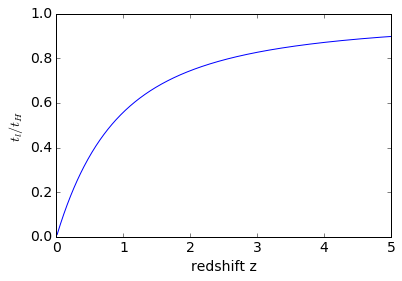

In [64]:
#sainity check against hogg's plot
#lookback time
plt.plot(z_array, L_t)
plt.xlabel('redshift z')
plt.ylabel('$t_{l}/t_{H}$')
plt.xlim(0,5)

(0, 5)

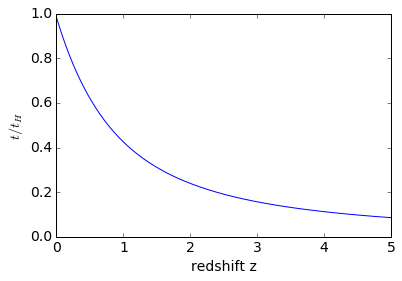

In [79]:
#sainity check against hogg's plot
#age of universe
plt.plot(z_array, Age)
plt.xlabel('redshift z')
plt.ylabel('$t/t_{H}$')
plt.xlim(0,5)

## Plots for problem 4 follow below
plots with physical units and dimensionless units are provided, depending if you want to put your observer or theorist cap on. We assume $h$, the dimensionless hubble parameter, =.7

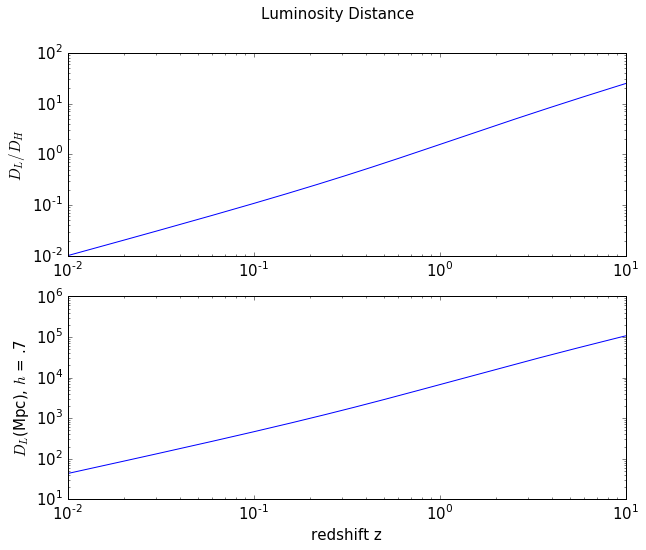

In [83]:
#luminosity distance plot
fig=plt.figure(figsize=(10.,8))
fig.suptitle('Luminosity Distance')
ax1=fig.add_subplot(211)
ax1.plot(z_array, L_d)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('$D_{L}/D_{H}$')

ax2=fig.add_subplot(212)
ax2.plot(z_array, L_d*(3000/.7)) #multiplying by the factor converts to Mpc
ax2.set_xlabel('redshift z')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('$D_{L}$(Mpc), $h$ = .7')

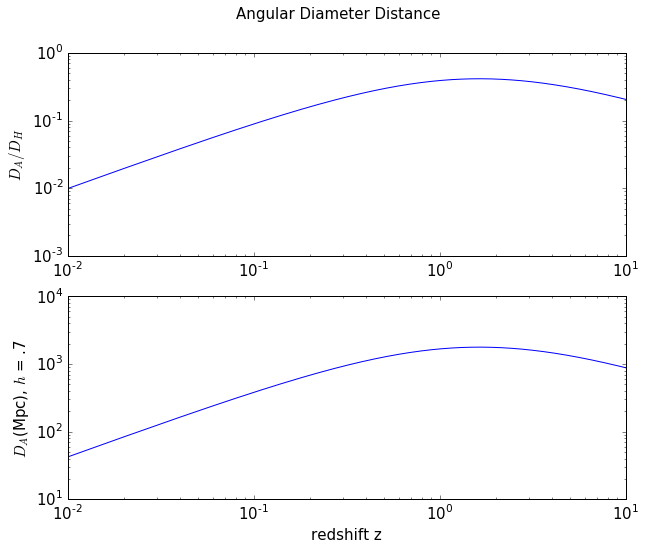

In [84]:
#Angular Diameter Distance Plot
fig=plt.figure(figsize=(10.,8))
fig.suptitle('Angular Diameter Distance')
ax1=fig.add_subplot(211)
ax1.plot(z_array, A_d)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('$D_{A}/D_{H}$')

ax2=fig.add_subplot(212)
ax2.plot(z_array, A_d*(3000/.7)) #multiplying by the factor converts to Mpc
ax2.set_xlabel('redshift z')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('$D_{A}$(Mpc), $h$ = .7')

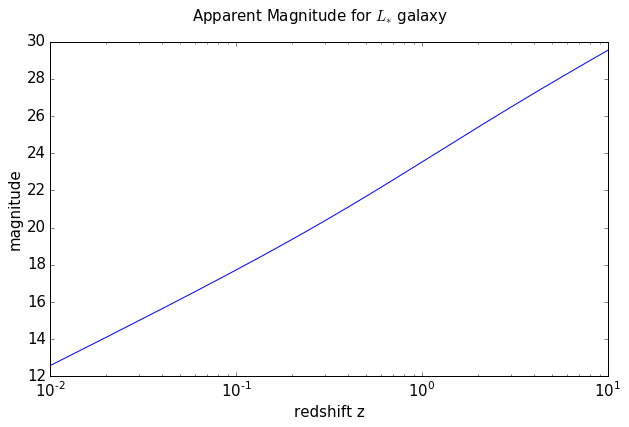

In [86]:
#use parameters from cool dude scheter's paper
M_star = -20.6
m_ap = 5*np.log10(L_d*(3000/.7)*(10**6)/10) + M_star

#make the apparent magnitude plot of an L_* galaxy
fig=plt.figure(figsize=(10,6))
fig.suptitle('Apparent Magnitude for $L_{*}$ galaxy')
ax=fig.add_subplot(111)
ax.plot(z_array, m_ap)
ax.set_xlabel('redshift z')
ax.set_ylabel('magnitude')
ax.set_xscale('log')

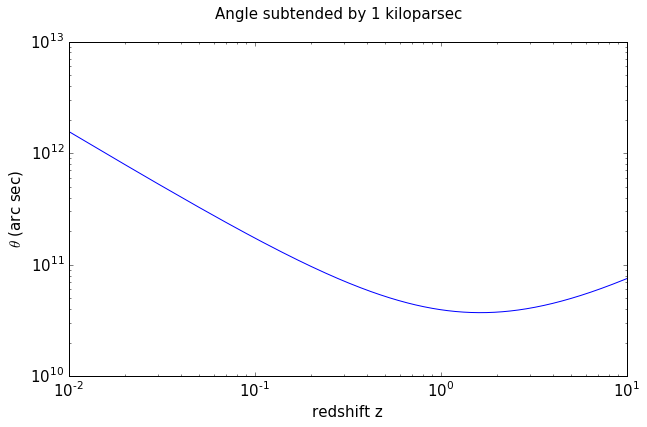

In [90]:
#calculate angle subtended convert to arc sec/ kiloparsec
angle_subtend=1./A_d*(3000/.7)* 10**3

fig=plt.figure(figsize=(10,6))
fig.suptitle('Angle subtended by 1 kiloparsec')
ax=fig.add_subplot(111)
ax.plot(z_array, 60*60*angle_subtend) #convert the angle to arc seconds
ax.set_xlabel('redshift z')
ax.set_ylabel(r'$\theta $ (arc sec)')
ax.set_xscale('log')
ax.set_yscale('log')

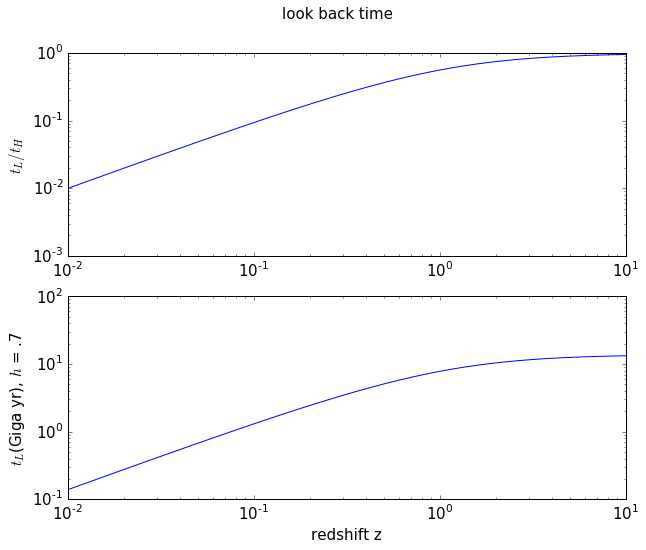

In [91]:
fig=plt.figure(figsize=(10.,8))
fig.suptitle('look back time')
ax1=fig.add_subplot(211)
ax1.plot(z_array, L_t)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('$t_{L}/t_{H}$')

ax2=fig.add_subplot(212)
ax2.plot(z_array, L_t*(9.78/.7)) #multiplying by the factor converts to gigayears
ax2.set_xlabel('redshift z')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('$t_{L}$(Giga yr), $h$ = .7')

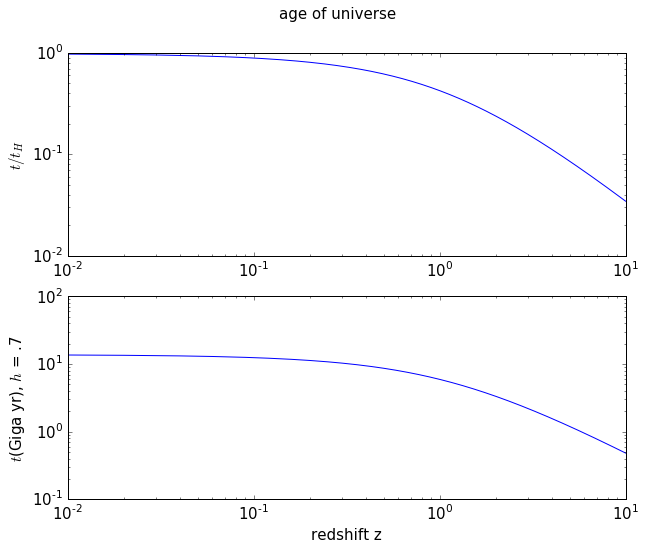

In [92]:
fig=plt.figure(figsize=(10.,8))
fig.suptitle('age of universe')
ax1=fig.add_subplot(211)
ax1.plot(z_array, Age)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('$t/t_{H}$')

ax2=fig.add_subplot(212)
ax2.plot(z_array, Age*(9.78/.7)) #multiplying by the factor converts to gigayears
ax2.set_xlabel('redshift z')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('$t$(Giga yr), $h$ = .7')

## Problem 5
we have to do some data ju-jitsu before we calculate the K correction

In [98]:
#read in our data files
V_resp = ascii.read('V.dat')
V_resp.rename_column('col1', 'lambda')
V_resp.rename_column('col2', 'eff')

e_spec = ascii.read('E.flux.dat')
e_spec.rename_column('col1', 'lambda')
e_spec.rename_column('col2', 'inten')

sbc_spec = ascii.read('Sbc.flux.dat')
sbc_spec.rename_column('col1', 'lambda')
sbc_spec.rename_column('col2', 'inten')

In [110]:
print "the domain of the V filter is %i - %i with %i elements" %(V_resp['lambda'].min(),
                                                                 V_resp['lambda'].max(), V_resp['lambda'].size)

the domain of the V filter is 4750 - 6500 with 176 elements


In [102]:
#make interpolation objects for each function
V_resp_interp = interp1d(V_resp['lambda'], V_resp['eff'])
e_spec_interp = interp1d(e_spec['lambda'], e_spec['inten'])
sbc_spec_interp = interp1d(sbc_spec['lambda'], sbc_spec['inten'])

In [109]:
def conv(wave_range, response_interp, spec_interp, z=0):
    """
    Calculate convolution of filter response and galaxy spectrum
    Inputs:
        wave_range : a numpy array of wavelength values. should be between 4750 - 6500 angstroms.
                    this is the wavelength range of the filter, which dictates the integral range
        response_interp : the interpolation object for the filter's response
        spec_interp : the interpolation object for the galaxies filter
        z : redshift"""
    integrand = spec_interp(wave_range/(1 + z))*response_interp(wave_range)
    return simps(integrand, wave_range)

def K_correction(wave_range, response_interp, spec_interp, z):
    """Calculate the classic K Correction for a galaxy at redshift z"""
    #the numerator of the log's argument
    log_arg_num = conv(wave_range, response_interp, spec_interp, z=0)
    #denominator of the logs argument
    log_arg_denom = conv(wave_range, response_interp, spec_interp, z=z)
    
    return 2.5*math.log10(1+z) + 2.5*math.log10(log_arg_num / log_arg_denom)

In [112]:
wave_vector = np.linspace(4750,6500,200)
z_vector = np.linspace(0,1,100)

#initialize arrays to hold the K corrections
K_e = np.zeros(100)
K_sbc = np.zeros(100)

#assign the k corrections
for i in range(0,100):
    K_e[i] = K_correction(wave_vector, V_resp_interp, e_spec_interp, z_vector[i])
    K_sbc[i] = K_correction(wave_vector, V_resp_interp, sbc_spec_interp, z_vector[i])

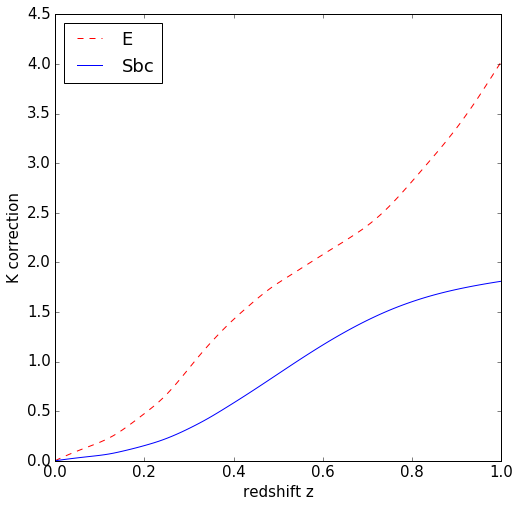

In [117]:
#plot up dem results 
fig=plt.figure(figsize=(8,8))
plt.plot(z_vector, K_e, 'r--', label='E')
plt.plot(z_vector, K_sbc, 'b-', label='Sbc')
plt.legend(loc='upper left')
plt.xlabel('redshift z')
plt.ylabel('K correction')